<a href="https://colab.research.google.com/github/grnbatera/TFC/blob/main/TFC_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando arquivos do GitHub



In [2174]:
!git clone https://github.com/grnbatera/TFC.git

fatal: destination path 'TFC' already exists and is not an empty directory.


#Instalando Tensorflow I/O e Instalando Bibliotecas

In [2175]:
#Instalando módulo i/o do tensorflow
!pip install -q tensorflow-io

In [2176]:
%matplotlib inline  
import matplotlib.pyplot as plt 
import numpy as np 
from IPython.display import Audio 
import librosa 
import librosa.display 
import librosa.feature
import pandas as pd
import math
import seaborn as sns
import matplotlib as mpl
import tensorflow as tf
import tensorflow_io as tfio
import scipy
from scipy import signal

#Configurando os Gráficos pelo Seaborn

In [2177]:
mpl.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.family'] = 'Roboto'
sns.set(font='Roboto',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
 
sns.set_context("notebook", rc={"font.size":20,
                                "axes.titlesize":24,
                                "axes.labelsize":18})
                             

#Análise do Modelamento Físico com Digital Waveguide

##Reflexão, Posição na Waveguide e Filtro de Condições Iniciais

In [2178]:
r0 = 1 
r1 = -0.3 
a1 = [r0, r1] #vetor de reflexão e denominador filtro CI
p = 1 #posição na waveguide
b1 = p * (a1[0]+a1[1])#numerador filtro CI

##Excitação por Resposta ao Impulso Unitário, de Corpo e determinação da fs

In [2179]:
f1='/content/TFC/IR01/Classical-AmBu2F.wav'
y1, fs=librosa.load(f1, sr=22050, mono=True)

In [2180]:
Audio(data=y1,rate=fs)

In [2181]:
f2='/content/TFC/IR01/Collings-D2H.wav'
y2, fs=librosa.load(f2, sr=22050, mono=True)

In [2182]:
Audio(data=y2,rate=fs)

In [2183]:
f3='/content/TFC/IR01/Gibson-J45.wav'
y3, fs=librosa.load(f3, sr=22050, mono=True)

In [2184]:
Audio(data=y3,rate=fs)

In [2185]:
f4='/content/TFC/IR01/Hummingbird-Classic.wav'
y4, fs=librosa.load(f4, sr=22050, mono=True)

In [2186]:
Audio(data=y4,rate=fs)

In [2187]:
f5='/content/TFC/IR01/Martin-HD28.wav'
y5, fs=librosa.load(f5, sr=22050, mono=True)

In [2188]:
Audio(data=y5,rate=fs)

In [2189]:
f6='/content/TFC/IR01/Taylor-814.wav'
y6, fs=librosa.load(f6, sr=22050, mono=True)

In [2190]:
Audio(data=y6,rate=fs)

In [2191]:
y0=scipy.signal.unit_impulse(len(y1),)

In [2192]:
Audio(data=y0,rate=fs)

In [2193]:
f7='/content/TFC/IR01/body1.wav'
y7, fs=librosa.load(f7, sr=22050, mono=True)

In [2194]:
Audio(data=y7,rate=fs)

In [2195]:
f8='/content/TFC/notaBviolao.wav'
y8, fs=librosa.load(f8, sr=None, mono=True)

In [2196]:
Audio(data=y8,rate=fs)

##Gráfico do Áudio Original:

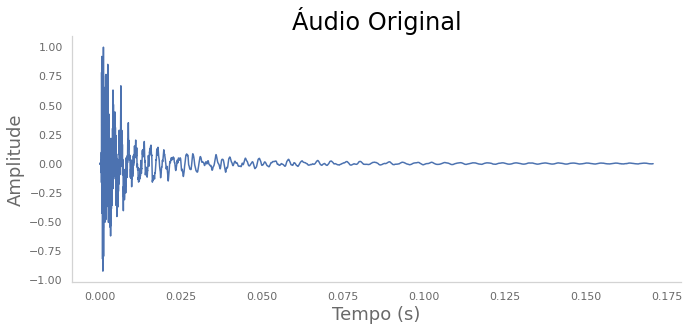

In [2197]:
plt.figure(figsize=(10, 5))
t=np.arange(len(y7))/fs
plt.title('Áudio Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.plot(t,y7)
plt.tight_layout()
plt.savefig('/content/TFC/audiooriginal.svg', format='svg', dpi=800)

##Gráfico do STFT do Áudio Original:

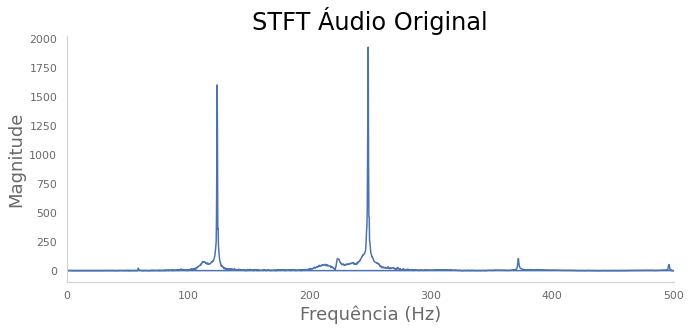

In [2198]:
plt.figure(figsize=(10, 5))
Y = np.fft.fft(y8) 
freq = np.fft.fftfreq(y8.size, d=1/fs) 
plt.plot(freq, np.abs(Y)) 
plt.title('STFT Áudio Original') 
plt.xlabel('Frequência (Hz)') 
plt.ylabel('Magnitude') 
plt.xlim([0, 500])
plt.tight_layout()
plt.savefig('/content/TFC/stftoriginal.svg', format='svg', dpi=800)

In [2199]:
S1a = np.abs(librosa.stft(y8, n_fft=4096))**2
chroma1 = librosa.feature.chroma_stft(S=S1a, sr=fs)

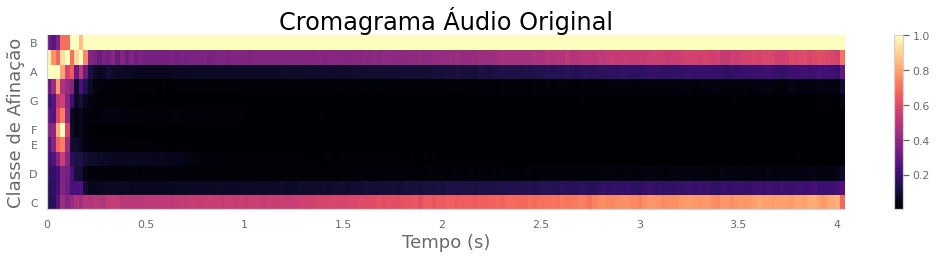

In [2200]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Cromagrama Áudio Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Classe de Afinação')
plt.tight_layout()
plt.savefig('/content/TFC/cromaoriginal.svg', format='svg', dpi=800)


##Cálculo do Tamanho da Waveguide e fator de estabilidade

In [2201]:
f=246.942 #frquência da nota desejada
phi=0.4275 #fase do delay (aproximação)
D = math.floor(fs/f - phi) #Tamanho  da Waveguide em samples
delta = fs/f - phi - D #fator de estabilidade
#condição para evitar instabilidade - delta=[0.1,1.1]
if delta < 0.1:
  delta = delta + 1
  D = D - 1

##Fitro Fracional

In [2202]:
eta = (1-delta) / (1+delta)
a2 = [1,eta] #denomonador filtro fracional
b2 = [eta,1] #numerador filtro fracional 

##Filtro de Corpo de Instrumento de Corda Vibrante

In [2203]:
#1º Convoluir Filtro de CI com Filtro fracional
num=np.convolve(b1,b2)
den=np.convolve(a1,a2)

#2º Determinar o numerador e denominador do Filtro
b=den
k=D-len(den)
m=np.zeros((k,))
z=-num
a=np.hstack((b,m,z))

In [2204]:
t = 1#tempo de duração da nota

###Caso do Impulso Unitário

In [2205]:
z0=np.zeros((t*fs-len(y0)),)
x0=np.hstack((y0,z0))

In [2206]:
violao0 = scipy.signal.lfilter(b,a,x0)
#violao0 = violao0/(max(abs(violao0))+.1)

In [2207]:
Audio(data=violao0,rate=fs)

###Caso do IR do Classical-AmBu2F

In [2208]:
z1=np.zeros((t*fs-len(y1)),)
x1=np.hstack((y1,z1))

In [2209]:
violao1 = scipy.signal.lfilter(b,a,x1)
#violao1 = violao1/(max(abs(violao1))+.1)

In [2210]:
Audio(data=violao1,rate=fs)

###Caso do IR do Collings-D2H

In [2211]:
z2=np.zeros((t*fs-len(y2)),)
x2=np.hstack((y2,z2))

In [2212]:
violao2 = scipy.signal.lfilter(b,a,x2)
#violao2 = violao2/(max(abs(violao2))+.1)

In [2213]:
Audio(data=violao2,rate=fs)

###Caso do IR do Gibson-J45

In [2214]:
z3=np.zeros((t*fs-len(y3)),)
x3=np.hstack((y3,z3))

In [2215]:
violao3 = scipy.signal.lfilter(b,a,x3)
#violao3 = violao3/(max(abs(violao3))+.1)

In [2216]:
Audio(data=violao3,rate=fs)

###Caso do IR do Hummingbird-Classic

In [2217]:
z4=np.zeros((t*fs-len(y4)),)
x4=np.hstack((y4,z4))

In [2218]:
violao4 = scipy.signal.lfilter(b,a,x4)
#violao4 = violao4/(max(abs(violao4))+.1)

In [2219]:
Audio(data=violao4,rate=fs)

###Caso do IR do Martin-HD28

In [2220]:
z5=np.zeros((t*fs-len(y5)),)
x5=np.hstack((y5,z5))

In [2221]:
violao5 = scipy.signal.lfilter(b,a,x5)
#violao5 = violao5/(max(abs(violao5))+.1)

In [2222]:
Audio(data=violao5,rate=fs)

###Caso do IR do Taylor-814

In [2223]:
z6=np.zeros((t*fs-len(y6)),)
x6=np.hstack((y6,z6))

In [2224]:
violao6 = scipy.signal.lfilter(b,a,x6)
#violao6 = violao6/(max(abs(violao6))+.1)

In [2225]:
Audio(data=violao6,rate=fs)

###Caso do IR do CCMRA

In [2226]:
z7=np.zeros((t*fs-len(y7)),)
x7=np.hstack((y7,z7))

In [2227]:
violao7 = scipy.signal.lfilter(b,a,x7)
#violao7 = violao7/(max(abs(violao7))+.1)

In [2228]:
Audio(data=violao7,rate=fs)

##MIR do Áudio Sintetizado

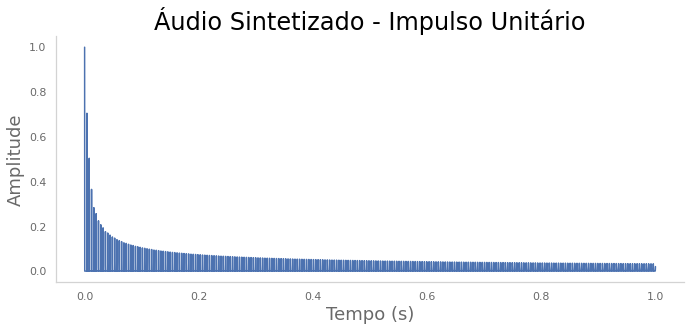

In [2229]:
plt.figure(figsize=(10, 5))
t=np.arange(len(violao0))/fs
plt.title('Áudio Sintetizado - Impulso Unitário')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.plot(t,violao0)
plt.tight_layout()
plt.savefig('/content/TFC/audio00.svg', format='svg', dpi=800)

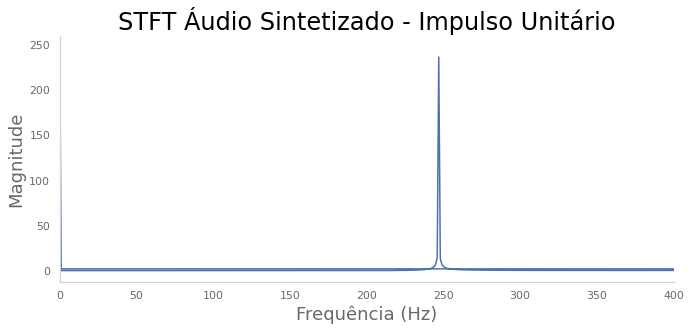

In [2230]:
plt.figure(figsize=(10, 5))
Y = np.fft.fft(violao0) 
freq = np.fft.fftfreq(violao0.size, d=1/fs) 
plt.plot(freq, np.abs(Y)) 
plt.title('STFT Áudio Sintetizado - Impulso Unitário') 
plt.xlabel('Frequência (Hz)') 
plt.ylabel('Magnitude') 
plt.xlim([0, 400])
plt.tight_layout()
plt.savefig('/content/TFC/stft00.svg', format='svg', dpi=800)

In [2231]:
S1a = np.abs(librosa.stft(violao0, n_fft=4096))**2
chroma1 = librosa.feature.chroma_stft(S=S1a, sr=fs)

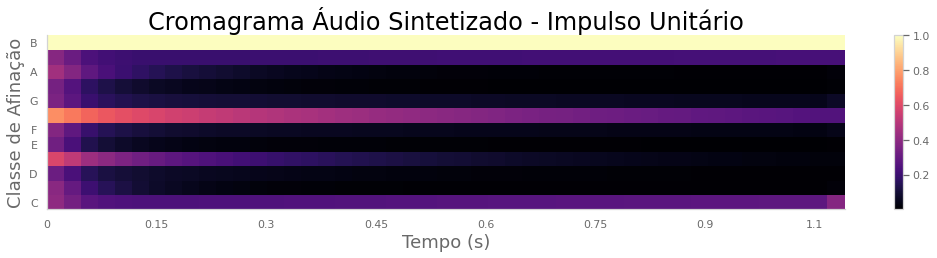

In [2232]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Cromagrama Áudio Sintetizado - Impulso Unitário')
plt.xlabel('Tempo (s)')
plt.ylabel('Classe de Afinação')
plt.tight_layout()
plt.savefig('/content/TFC/croma00.svg', format='svg', dpi=800)


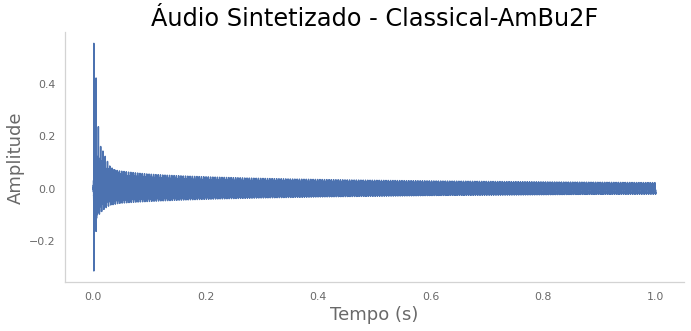

In [2233]:
plt.figure(figsize=(10, 5))
t=np.arange(len(violao1))/fs
plt.title('Áudio Sintetizado - Classical-AmBu2F')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.plot(t,violao1)
plt.tight_layout()
plt.savefig('/content/TFC/audio01.svg', format='svg', dpi=800)

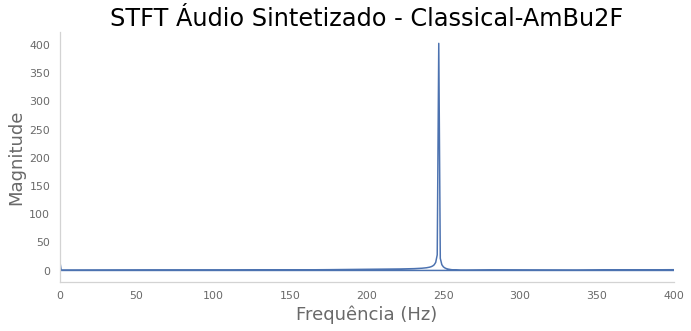

In [2234]:
plt.figure(figsize=(10, 5))
Y = np.fft.fft(violao1) 
freq = np.fft.fftfreq(violao1.size, d=1/fs) 
plt.plot(freq, np.abs(Y)) 
plt.title('STFT Áudio Sintetizado - Classical-AmBu2F') 
plt.xlabel('Frequência (Hz)') 
plt.ylabel('Magnitude') 
plt.xlim([0, 400])
plt.tight_layout()
plt.savefig('/content/TFC/stft01.svg', format='svg', dpi=800)

In [2235]:
S1a = np.abs(librosa.stft(violao1, n_fft=4096))**2
chroma1 = librosa.feature.chroma_stft(S=S1a, sr=fs)

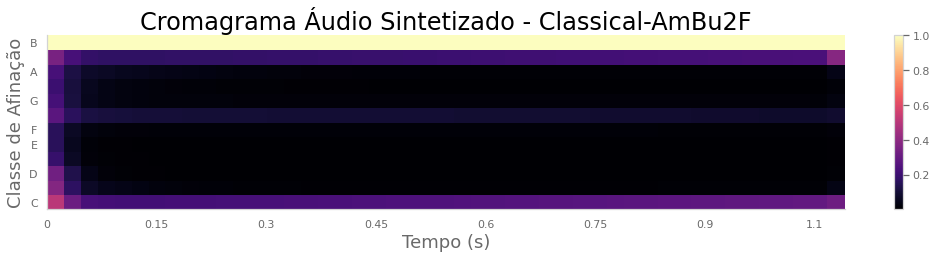

In [2236]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Cromagrama Áudio Sintetizado - Classical-AmBu2F')
plt.xlabel('Tempo (s)')
plt.ylabel('Classe de Afinação')
plt.tight_layout()
plt.savefig('/content/TFC/croma01.svg', format='svg', dpi=800)


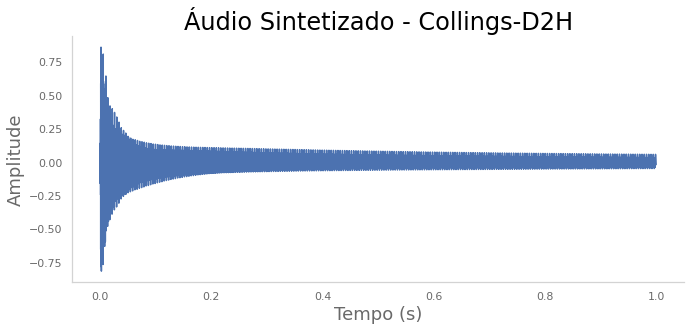

In [2237]:
plt.figure(figsize=(10, 5))
t=np.arange(len(violao2))/fs
plt.title('Áudio Sintetizado - Collings-D2H')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.plot(t,violao2)
plt.tight_layout()
plt.savefig('/content/TFC/audio02.svg', format='svg', dpi=800)

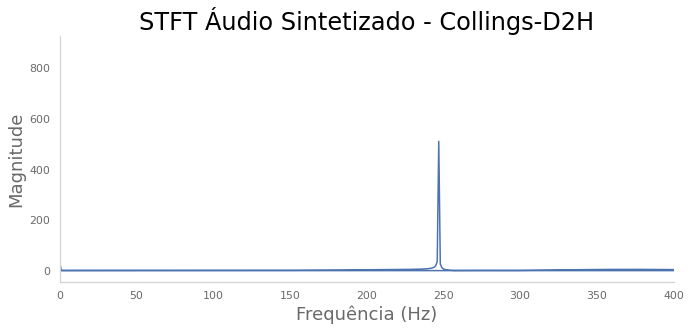

In [2238]:
plt.figure(figsize=(10, 5))
Y = np.fft.fft(violao2) 
freq = np.fft.fftfreq(violao2.size, d=1/fs) 
plt.plot(freq, np.abs(Y)) 
plt.title('STFT Áudio Sintetizado - Collings-D2H') 
plt.xlabel('Frequência (Hz)') 
plt.ylabel('Magnitude') 
plt.xlim([0, 400])
plt.tight_layout()
plt.savefig('/content/TFC/stft02.svg', format='svg', dpi=800)

In [2239]:
S1a = np.abs(librosa.stft(violao2, n_fft=4096))**2
chroma1 = librosa.feature.chroma_stft(S=S1a, sr=fs)

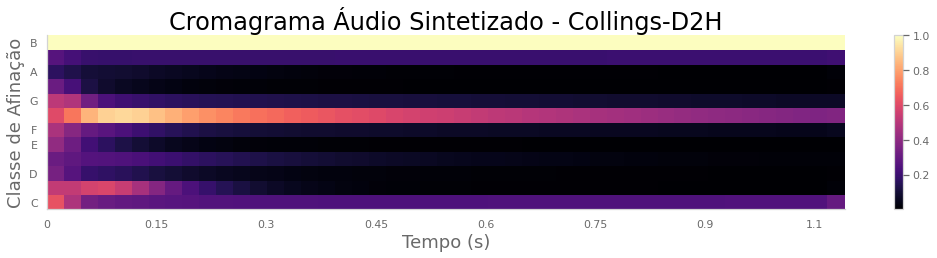

In [2240]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Cromagrama Áudio Sintetizado - Collings-D2H')
plt.xlabel('Tempo (s)')
plt.ylabel('Classe de Afinação')
plt.tight_layout()
plt.savefig('/content/TFC/croma02.svg', format='svg', dpi=800)


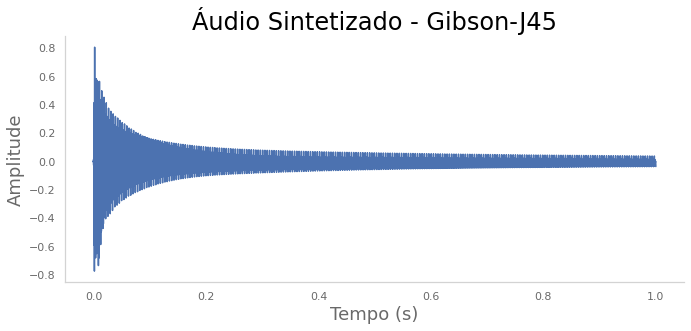

In [2241]:
plt.figure(figsize=(10, 5))
t=np.arange(len(violao3))/fs
plt.title('Áudio Sintetizado - Gibson-J45')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.plot(t,violao3)
plt.tight_layout()
plt.savefig('/content/TFC/audio03.svg', format='svg', dpi=800)

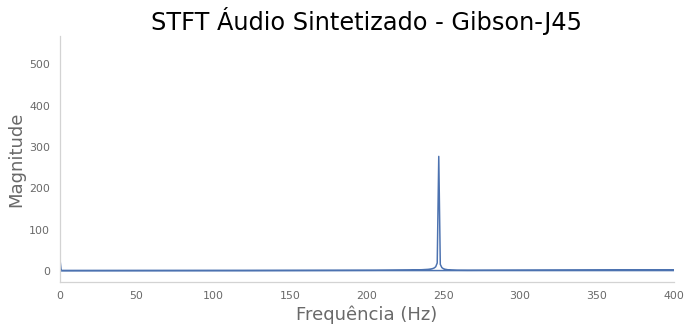

In [2242]:
plt.figure(figsize=(10, 5))
Y = np.fft.fft(violao3) 
freq = np.fft.fftfreq(violao3.size, d=1/fs) 
plt.plot(freq, np.abs(Y)) 
plt.title('STFT Áudio Sintetizado - Gibson-J45') 
plt.xlabel('Frequência (Hz)') 
plt.ylabel('Magnitude') 
plt.xlim([0, 400])
plt.tight_layout()
plt.savefig('/content/TFC/stft03.svg', format='svg', dpi=800)

In [2243]:
S1a = np.abs(librosa.stft(violao3, n_fft=4096))**2
chroma1 = librosa.feature.chroma_stft(S=S1a, sr=fs)

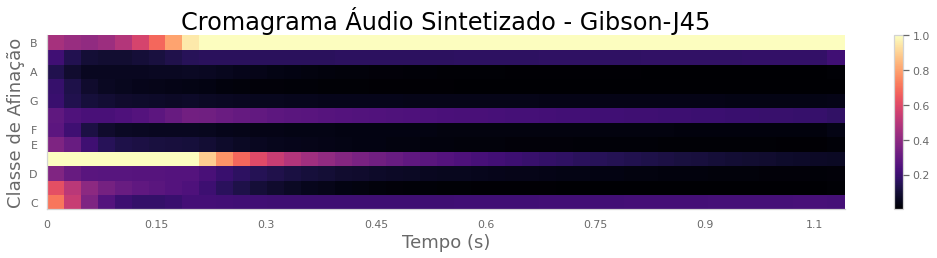

In [2244]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Cromagrama Áudio Sintetizado - Gibson-J45')
plt.xlabel('Tempo (s)')
plt.ylabel('Classe de Afinação')
plt.tight_layout()
plt.savefig('/content/TFC/croma03.svg', format='svg', dpi=800)


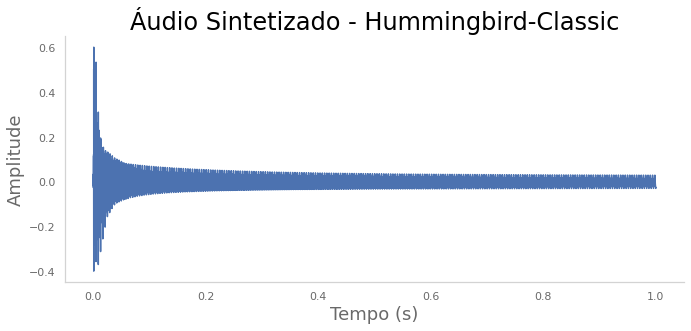

In [2245]:
plt.figure(figsize=(10, 5))
t=np.arange(len(violao4))/fs
plt.title('Áudio Sintetizado - Hummingbird-Classic')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.plot(t,violao4)
plt.tight_layout()
plt.savefig('/content/TFC/audio04.svg', format='svg', dpi=800)

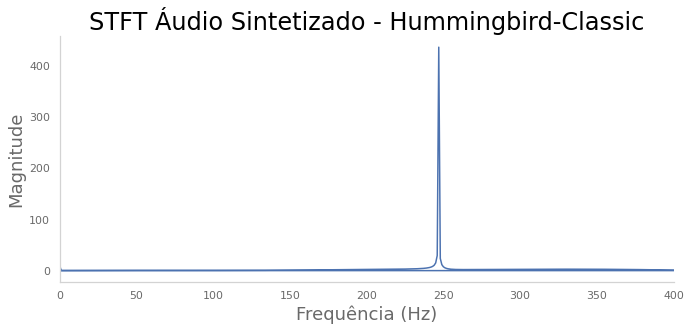

In [2246]:
plt.figure(figsize=(10, 5))
Y = np.fft.fft(violao4) 
freq = np.fft.fftfreq(violao4.size, d=1/fs) 
plt.plot(freq, np.abs(Y)) 
plt.title('STFT Áudio Sintetizado - Hummingbird-Classic') 
plt.xlabel('Frequência (Hz)') 
plt.ylabel('Magnitude') 
plt.xlim([0, 400])
plt.tight_layout()
plt.savefig('/content/TFC/stft04.svg', format='svg', dpi=800)

In [2247]:
S1a = np.abs(librosa.stft(violao4, n_fft=4096))**2
chroma1 = librosa.feature.chroma_stft(S=S1a, sr=fs)

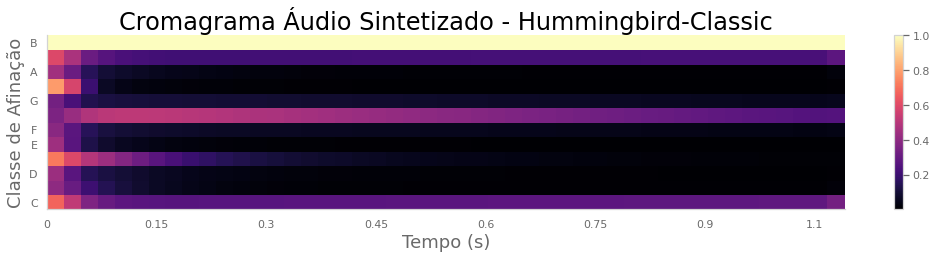

In [2248]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Cromagrama Áudio Sintetizado - Hummingbird-Classic')
plt.xlabel('Tempo (s)')
plt.ylabel('Classe de Afinação')
plt.tight_layout()
plt.savefig('/content/TFC/croma04.svg', format='svg', dpi=800)


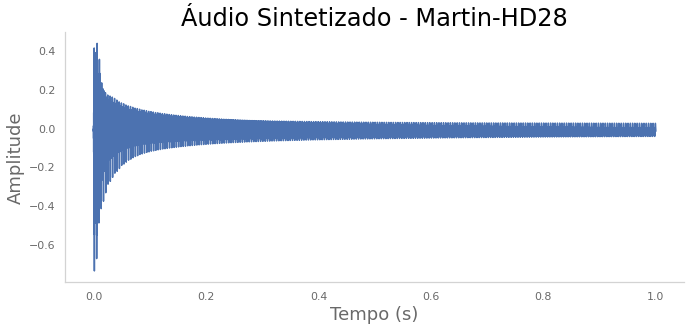

In [2249]:
plt.figure(figsize=(10, 5))
t=np.arange(len(violao5))/fs
plt.title('Áudio Sintetizado - Martin-HD28')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.plot(t,violao5)
plt.tight_layout()
plt.savefig('/content/TFC/audio05.svg', format='svg', dpi=800)

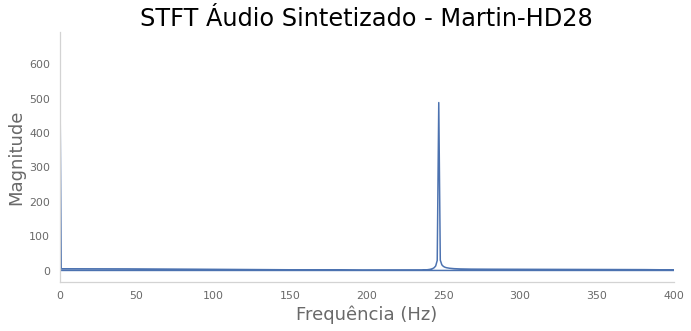

In [2250]:
plt.figure(figsize=(10, 5))
Y = np.fft.fft(violao5) 
freq = np.fft.fftfreq(violao5.size, d=1/fs) 
plt.plot(freq, np.abs(Y)) 
plt.title('STFT Áudio Sintetizado - Martin-HD28') 
plt.xlabel('Frequência (Hz)') 
plt.ylabel('Magnitude') 
plt.xlim([0, 400])
plt.tight_layout()
plt.savefig('/content/TFC/stft05.svg', format='svg', dpi=800)

In [2251]:
S1a = np.abs(librosa.stft(violao5, n_fft=4096))**2
chroma1 = librosa.feature.chroma_stft(S=S1a, sr=fs)

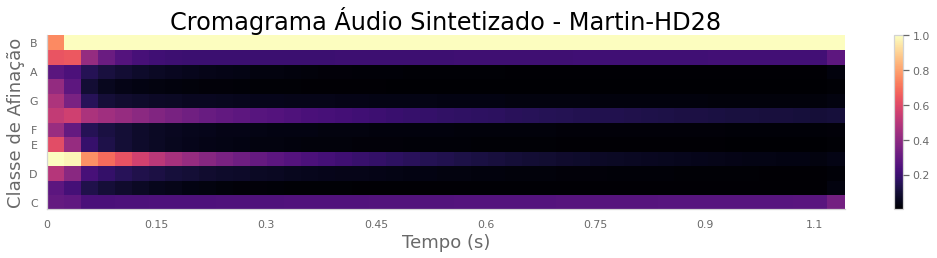

In [2252]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Cromagrama Áudio Sintetizado - Martin-HD28')
plt.xlabel('Tempo (s)')
plt.ylabel('Classe de Afinação')
plt.tight_layout()
plt.savefig('/content/TFC/croma05.svg', format='svg', dpi=800)


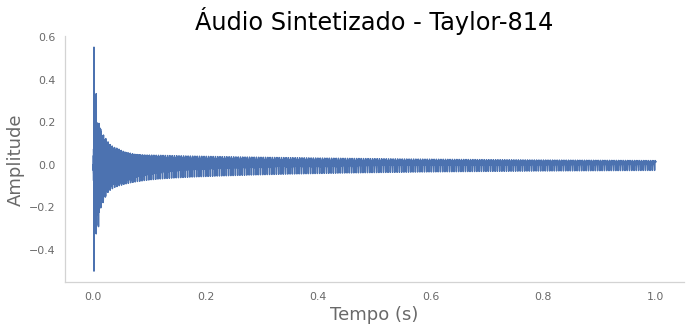

In [2253]:
plt.figure(figsize=(10, 5))
t=np.arange(len(violao6))/fs
plt.title('Áudio Sintetizado - Taylor-814')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.plot(t,violao6)
plt.tight_layout()
plt.savefig('/content/TFC/audio06.svg', format='svg', dpi=800)

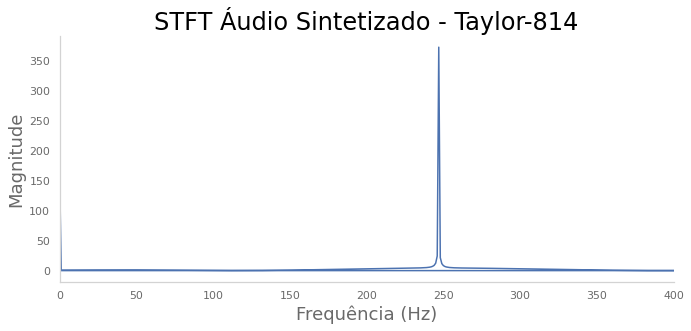

In [2254]:
plt.figure(figsize=(10, 5))
Y = np.fft.fft(violao6) 
freq = np.fft.fftfreq(violao6.size, d=1/fs) 
plt.plot(freq, np.abs(Y)) 
plt.title('STFT Áudio Sintetizado - Taylor-814') 
plt.xlabel('Frequência (Hz)') 
plt.ylabel('Magnitude') 
plt.xlim([0, 400])
plt.tight_layout()
plt.savefig('/content/TFC/stft06.svg', format='svg', dpi=800)

In [2255]:
S1a = np.abs(librosa.stft(violao6, n_fft=4096))**2
chroma1 = librosa.feature.chroma_stft(S=S1a, sr=fs)

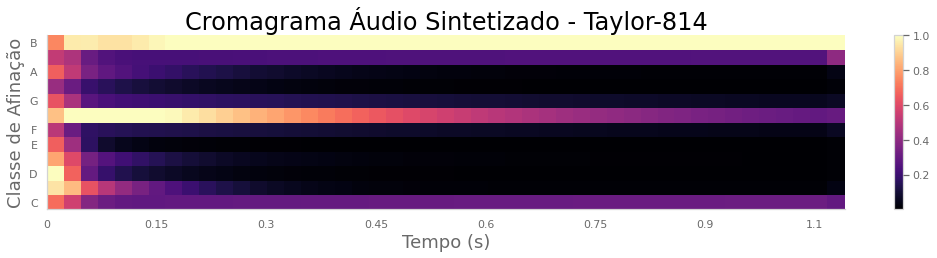

In [2256]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Cromagrama Áudio Sintetizado - Taylor-814')
plt.xlabel('Tempo (s)')
plt.ylabel('Classe de Afinação')
plt.tight_layout()
plt.savefig('/content/TFC/croma06.svg', format='svg', dpi=800)


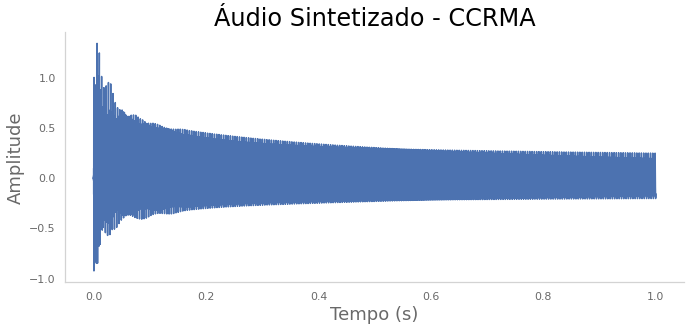

In [2257]:
plt.figure(figsize=(10, 5))
t=np.arange(len(violao7))/fs
plt.title('Áudio Sintetizado - CCRMA')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.plot(t,violao7)
plt.tight_layout()
plt.savefig('/content/TFC/audio07.svg', format='svg', dpi=800)

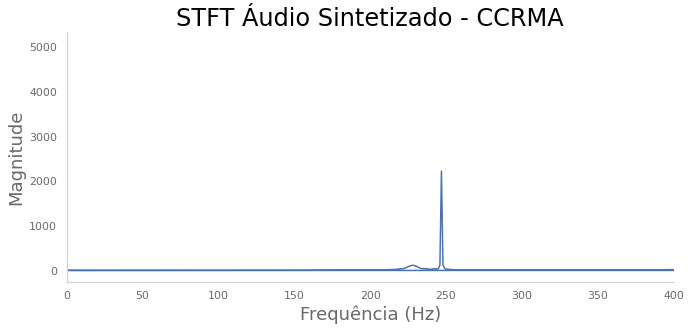

In [2258]:
plt.figure(figsize=(10, 5))
Y = np.fft.fft(violao7) 
freq = np.fft.fftfreq(violao7.size, d=1/fs) 
plt.plot(freq, np.abs(Y)) 
plt.title('STFT Áudio Sintetizado - CCRMA') 
plt.xlabel('Frequência (Hz)') 
plt.ylabel('Magnitude') 
plt.xlim([0, 400])
plt.tight_layout()
plt.savefig('/content/TFC/stft07.svg', format='svg', dpi=800)

In [2259]:
S1a = np.abs(librosa.stft(violao7, n_fft=4096))**2
chroma1 = librosa.feature.chroma_stft(S=S1a, sr=fs)

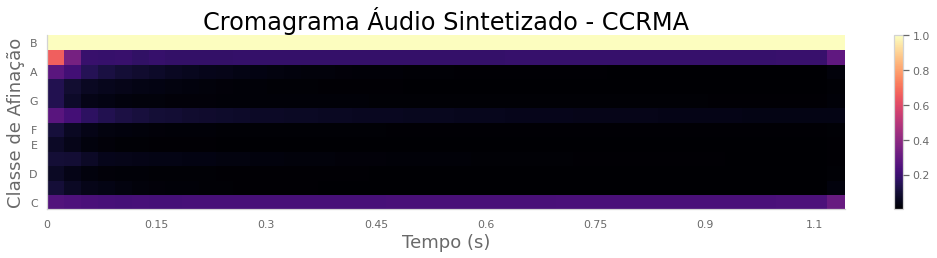

In [2260]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Cromagrama Áudio Sintetizado - CCRMA')
plt.xlabel('Tempo (s)')
plt.ylabel('Classe de Afinação')
plt.tight_layout()
plt.savefig('/content/TFC/croma07.svg', format='svg', dpi=800)
